In [3]:
import pandas as pd
import random
from faker import Faker
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
fake = Faker()

# 1. Génération du catalogue produits
categories = {
    "Smartphones": ["iPhone 13", "Samsung Galaxy S22", "Techno Camon 20", "iPhone 14 Pro", "iPhone 11 Pro Max"],
    "Ordinateurs": ["MacBook Pro", "Dell XPS 13", "HP Spectre x360", "Lenovo ThinkPad X1", "Asus ZenBook 14"],
    "Jeux Vidéo": ["PS5", "Xbox Series X", "Nintendo Switch", "Gaming PC", "VR Headset"],
    "Fournitures scolaires": ["Cahier A4", "Stylos Bic", "Calculatrice Sharp", "Calculatrice Casio", "Trousse scolaire"],
    "Été": ["Crème solaire", "Maillot de bain homme", "Maillot de bain femme", "Lunettes de soleil", "Chapeau de paille"],
    "Électroménager": ["Aspirateur Dyson", "Cafetière Nespresso", "Réfrigérateur Samsung", "Lave-vaisselle Bosch", "Four micro-ondes Whirlpool"],
    "Beauté": ["Parfum Dior", "Fond de teint Fenty Beauty", "Rouge à lèvres MAC", "Crème hydratante Nivea", "Shampooing Nova"],
    "Sport": ["Vélo", "Tapis de yoga", "Haltères 10kg", "Chaussures de running Nike", "Montre connectée Garmin"],
    "Automobile": ["Batterie de voiture", "Pneus Michelin", "Liquide frein", "Autoradio", "Kit entretien voiture"],
    "Maison": ["Table en bois", "Canapé 3 places", "Lampe de chevet", "Rideaux occultants", "Étagère murale"],
    "Religion": ["Coran", "Bible", "Tapis de prière", "Chapelet", "jelbab"],
    "Alimentation": ["Chocolat", "Café bio", "Pâtes artisanales", "Huile d'olive", "Jus Presséa"],
    "Musique": ["Guitare acoustique", "Piano numérique", "Casque audio Bose", "Enceinte Bluetooth JBL", "Microphone Shure"],
    "Jardin": ["Salon de jardin", "Barbecue Weber", "Tondeuse à gazon", "Plantes d'intérieur", "Hamac suspendu"],
    "Bébé": ["Poussette Chicco", "Siège auto", "Couches bébé", "Biberon Avent", "Jouet Spiderman"],
    "High-Tech": ["Drone DJI", "Écran 4K", "Casque VR Oculus", "Tablette iPad", "Souris gamer Logitech"]
}

produits = []
for i, (nom, categorie) in enumerate(
    [(prod, cat) for cat, prods in categories.items() for prod in prods]
):
    produits.append([
        i + 1,
        nom,
        categorie,
        round(random.uniform(100, 3000), 2)
    ])

df_catalogue = pd.DataFrame(produits, columns=["Produit_ID", "Nom", "Catégorie", "Prix"])

# 2. Génération du Clickstream avec pics saisonniers
def weighted_month(pics):
    weights = [5] * 12 # par defaut yeup 5
    for m in pics.get("gros", []):
        weights[m-1] = 30  # gros pic
    for m in pics.get("moyen", []):
        weights[m-1] = 15  # Moyen pic
    for m in pics.get("petit", []):
        weights[m-1] = 10  # Petit pic
    return random.choices(range(1, 13), weights=weights)[0]

# Mapping des pics par catégorie
pics_per_category = {
    "Smartphones": {"gros": [9,12], "moyen": [10,1], "petit": [11, 8]},
     "Jeux Vidéo": {"gros": [12, 1], "moyen": [6,7], "petit": [8]},
     "Été": {"gros": [6, 7], "moyen": [5], "petit": [8]},
     "Fournitures scolaires": {"gros": [9, 10], "moyen": [11], "petit": [8]},
     "Électroménager": {"gros": [1, 12], "moyen": [2], "petit": [5]},
     "Sport": {"gros": [8], "moyen": [6,7,9], "petit": [12,1]},
     "Maison": {"gros": [12], "moyen": [6], "petit": [8]},
     "Religion": {"gros": [3,2], "moyen": [4], "petit": [12,6]},
    "Musique": {"gros": [9, 12], "moyen": [11,6,7], "petit": [8]},
     "Bébé": {"gros": [1, 12], "moyen": [10], "petit": [4]},
     "High-Tech": {"gros": [12,6], "moyen": [11], "petit": [1]},
     "Jardin": {"gros": [6,5], "moyen": [7], "petit": [8]},
     "Beauté": {"gros": [6, 12], "moyen": [7,1], "petit": [8]},
     "Alimentation": {"gros": [9, 12], "moyen": [1,2,8], "petit": [3,6,4,5,7,11,10]},
     "Automobile": {"gros": [3], "moyen": [12], "petit": [1]},
    "Ordinateurs": {"gros": [9,10], "moyen": [12], "petit": [8]}
}

df_clickstream = pd.DataFrame([
    [fake.uuid4(), datetime(random.randint(2022, 2025), weighted_month(pics_per_category[random.choice(list(categories.keys()))]), random.randint(1, 28)),
     random.choice(["Recherche produit", "Ajout au panier", "Consultation produit", "Achat"]), random.randint(1, len(produits)), fake.uuid4()]
    for _ in range(100000)
], columns=["Session_ID", "Date", "Action", "Produit_ID", "Utilisateur"])

# 3. Génération de l'historique des ventes
df_historique_ventes = pd.DataFrame([
    [fake.uuid4(),
     datetime(random.randint(2022, 2025), 
              weighted_month(pics_per_category[df_catalogue.loc[produit_id-1, "Catégorie"]]), 
              random.randint(1, 28)),
     produit_id,
     random.randint(1, 10),
     round(random.uniform(10, 5000), 2)]
    for produit_id in random.choices(df_catalogue["Produit_ID"], k=50000)
], columns=["Commande_ID", "Date", "Produit_ID", "Quantité", "Montant"])


# 4. Génération des tendances externes
tendances = [
    ("Vacances d'été", [6, 7]),
    ("Soldes", [12, 6]),
    ("Nouveautés", [8, 9,12,1]),
    ("Black friday", [11, 12]),
    ("Fêtes de fin d'année", [12, 1]),
    ("Rentrée scolaire", [9, 10])
]
df_tendances = pd.DataFrame([
    [trend, random.randint(50, 500), datetime(year, month, random.randint(1, 28))]
    for trend, months in tendances
    for year in range(2022, 2026)
    for month in months 
    for _ in range(5)  # Ajoute 5 entrées par mois pour faire plus de lignes
], columns=["Produit", "Indice de popularité", "Date"])

# Sauvegarde en CSV
df_catalogue.to_csv("catalogue_produits.csv", index=False)
df_clickstream.to_csv("clickstream.csv", index=False)
df_tendances.to_csv("tendances_externes.csv", index=False)
df_historique_ventes.to_csv("historique_ventes.csv", index=False)

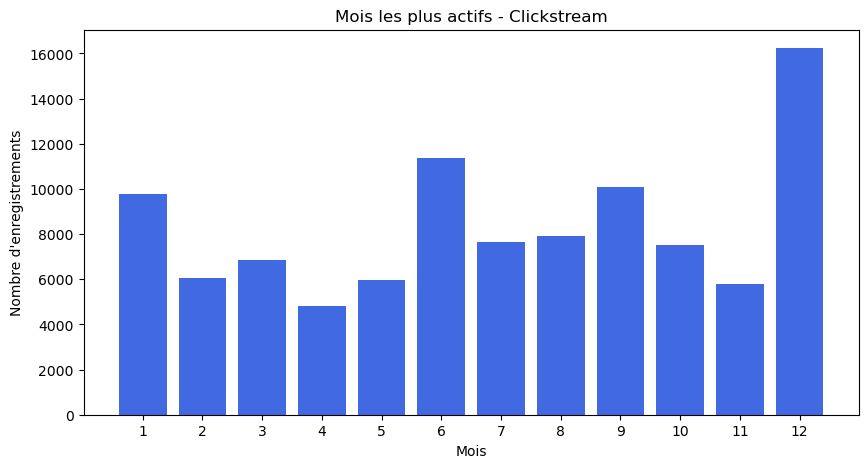

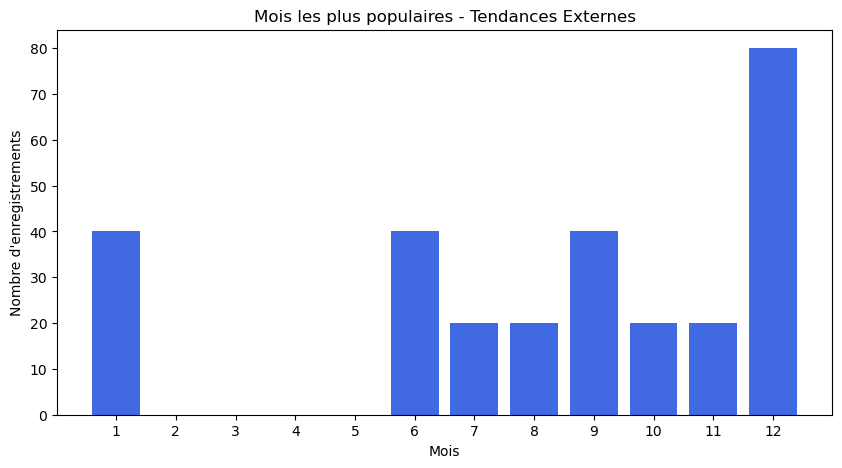

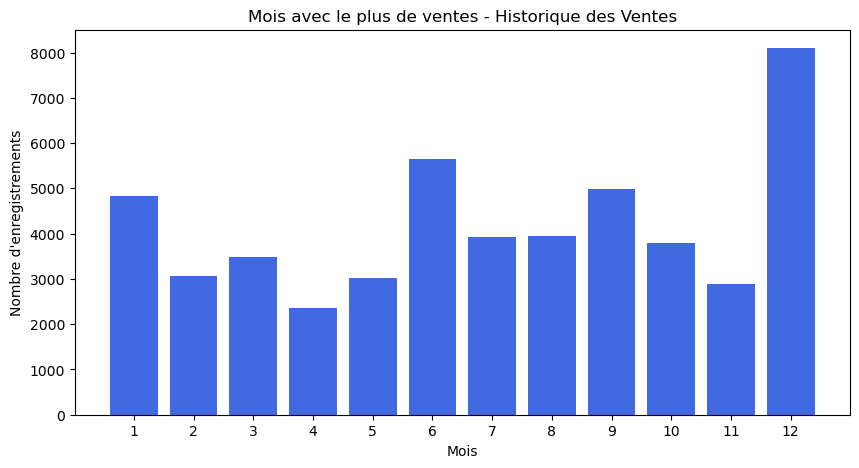

In [11]:
df_clickstream = pd.read_csv("clickstream.csv", parse_dates=["Date"])
df_tendances = pd.read_csv("tendances_externes.csv", parse_dates=["Date"])
df_historique_ventes = pd.read_csv("historique_ventes.csv", parse_dates=["Date"])

# Fonction pour afficher les mois les plus actifs
def plot_best_months(df, date_column, title):
    df["Mois"] = df[date_column].dt.month
    month_counts = df["Mois"].value_counts().sort_index()
    
    plt.figure(figsize=(10, 5))
    plt.bar(month_counts.index, month_counts.values, color='royalblue')
    plt.xlabel("Mois")
    plt.ylabel("Nombre d'enregistrements")
    plt.title(title)
    plt.xticks(range(1, 13))
    plt.show()

# Afficher les résultats
plot_best_months(df_clickstream, "Date", "Mois les plus actifs - Clickstream")
plot_best_months(df_tendances, "Date", "Mois les plus populaires - Tendances Externes")
plot_best_months(df_historique_ventes, "Date", "Mois avec le plus de ventes - Historique des Ventes")

/var/folders/bx/204yq0ms2g9b_nsks2zdj9500000gp/T/ipykernel_14597/1612067198.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes_iphone["Mois"] = ventes_iphone["Date"].dt.to_period("M")
/var/folders/bx/204yq0ms2g9b_nsks2zdj9500000gp/T/ipykernel_14597/1612067198.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes_ps5["Mois"] = ventes_ps5["Date"].dt.to_period("M")
/var/folders/bx/204yq0ms2g9b_nsks2zdj9500000gp/T/ipykernel_14597/1612067198.py:20: SettingWithCopyWarning: 
A value is trying to be 

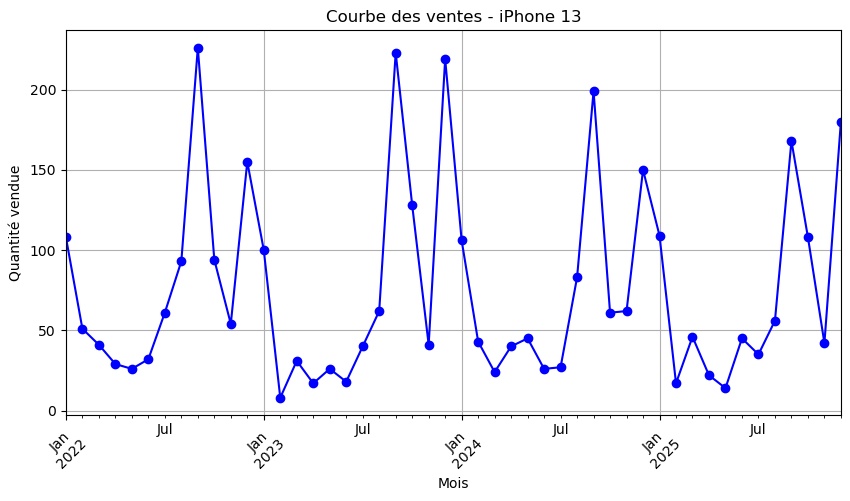

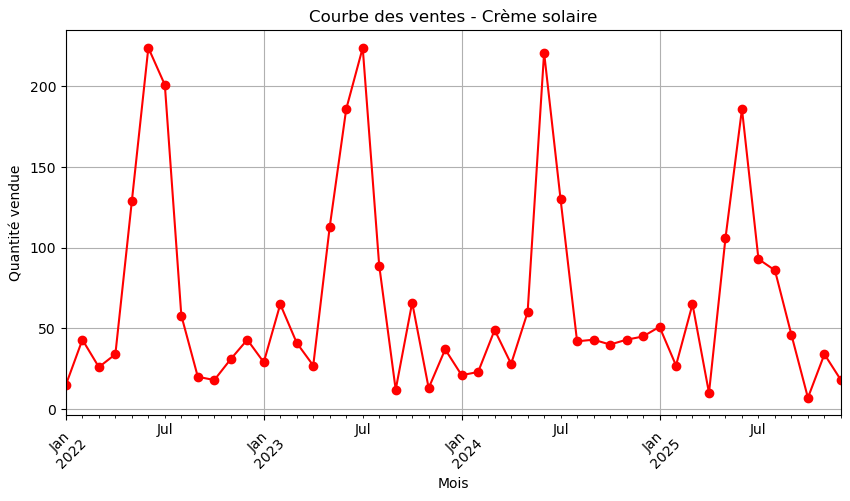

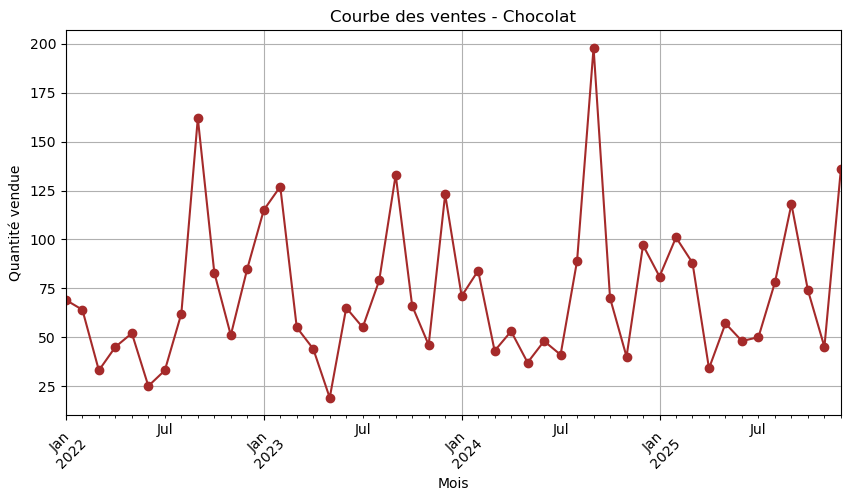

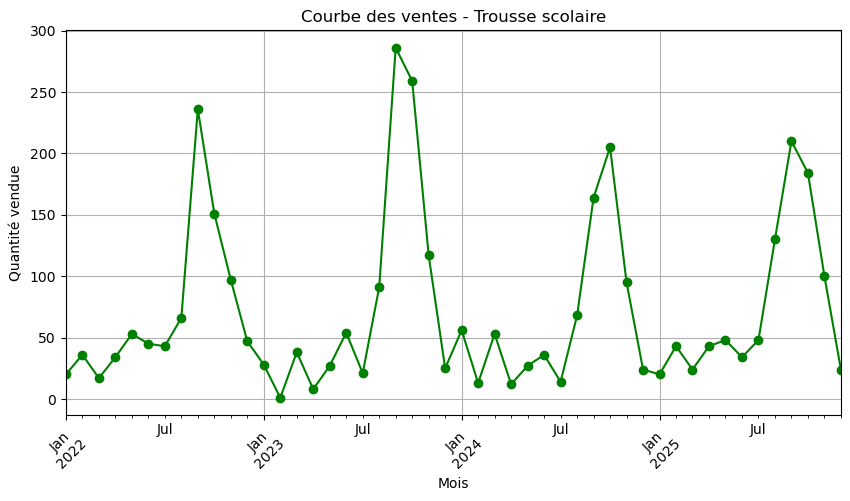

In [13]:
# Charger les datasets
df_historique_ventes = pd.read_csv("historique_ventes.csv", parse_dates=["Date"])
df_catalogue = pd.read_csv("catalogue_produits.csv")

# Récupérer les ID des produits A afficher
iphone_id = df_catalogue[df_catalogue["Nom"] == "iPhone 13"]["Produit_ID"].values
p2_id = df_catalogue[df_catalogue["Nom"] == "Crème solaire"]["Produit_ID"].values
p3_id = df_catalogue[df_catalogue["Nom"] == "Chocolat"]["Produit_ID"].values
p4_id = df_catalogue[df_catalogue["Nom"] == "Trousse scolaire"]["Produit_ID"].values

# Filtrer les ventes pour iPhone 13 et PS5
ventes_iphone = df_historique_ventes[df_historique_ventes["Produit_ID"].isin(iphone_id)]
ventes_ps5 = df_historique_ventes[df_historique_ventes["Produit_ID"].isin(ps5_id)]
ventes_p3 = df_historique_ventes[df_historique_ventes["Produit_ID"].isin(p3_id)]
ventes_p4 = df_historique_ventes[df_historique_ventes["Produit_ID"].isin(p4_id)]

# Agréger les ventes par mois
ventes_iphone["Mois"] = ventes_iphone["Date"].dt.to_period("M")
ventes_ps5["Mois"] = ventes_ps5["Date"].dt.to_period("M")
ventes_p3["Mois"] = ventes_p3["Date"].dt.to_period("M")
ventes_p4["Mois"] = ventes_p4["Date"].dt.to_period("M")

ventes_iphone_grouped = ventes_iphone.groupby("Mois")["Quantité"].sum()
ventes_ps5_grouped = ventes_ps5.groupby("Mois")["Quantité"].sum()
ventes_p3_grouped = ventes_p3.groupby("Mois")["Quantité"].sum()
ventes_p4_grouped = ventes_p4.groupby("Mois")["Quantité"].sum()

# Tracer la courbe des ventes
def plot_ventes(data, title, color):
    plt.figure(figsize=(10, 5))
    data.plot(kind="line", marker="o", color=color)
    plt.xlabel("Mois")
    plt.ylabel("Quantité vendue")
    plt.title(title)
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

plot_ventes(ventes_iphone_grouped, "Courbe des ventes - iPhone 13", "blue")
plot_ventes(ventes_ps5_grouped, "Courbe des ventes - Crème solaire", "red")
plot_ventes(ventes_p3_grouped, "Courbe des ventes - Chocolat", "brown")
plot_ventes(ventes_p4_grouped, "Courbe des ventes - Trousse scolaire", "green")